In [7]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys
path = str(Path(Path('File.py').parent.absolute()).parent.absolute())
sys.path.insert(0, path)

import numpy as np
import matplotlib as mlab
import matplotlib.pyplot as plt
import xarray as xr
import os as os
import glob
import matplotlib.gridspec as gridspec
from collections import namedtuple
import netCDF4 as ncdf

from Plot_tools import *
from File_tools import *

import pickle

_nthreads = 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
filename = '/scratch/wicker/solo/squall_12_C3500/atmos_hifreq.nc'

run1 = ncdf.Dataset(filename)

filename = '/scratch/wicker/solo/squall_12_R_C3500/atmos_hifreq.nc'

run2 = ncdf.Dataset(filename)

filename = '/scratch/wicker/solo/squall_12_C3500_B/atmos_hifreq.nc'

run3 = ncdf.Dataset(filename)
        

In [58]:
run1_w      = run1['dzdt'][:,::-1,:,:]
run2_w      = run2['dzdt'][:,::-1,:,:]
run3_w      = run3['dzdt'][:,::-1,:,:]

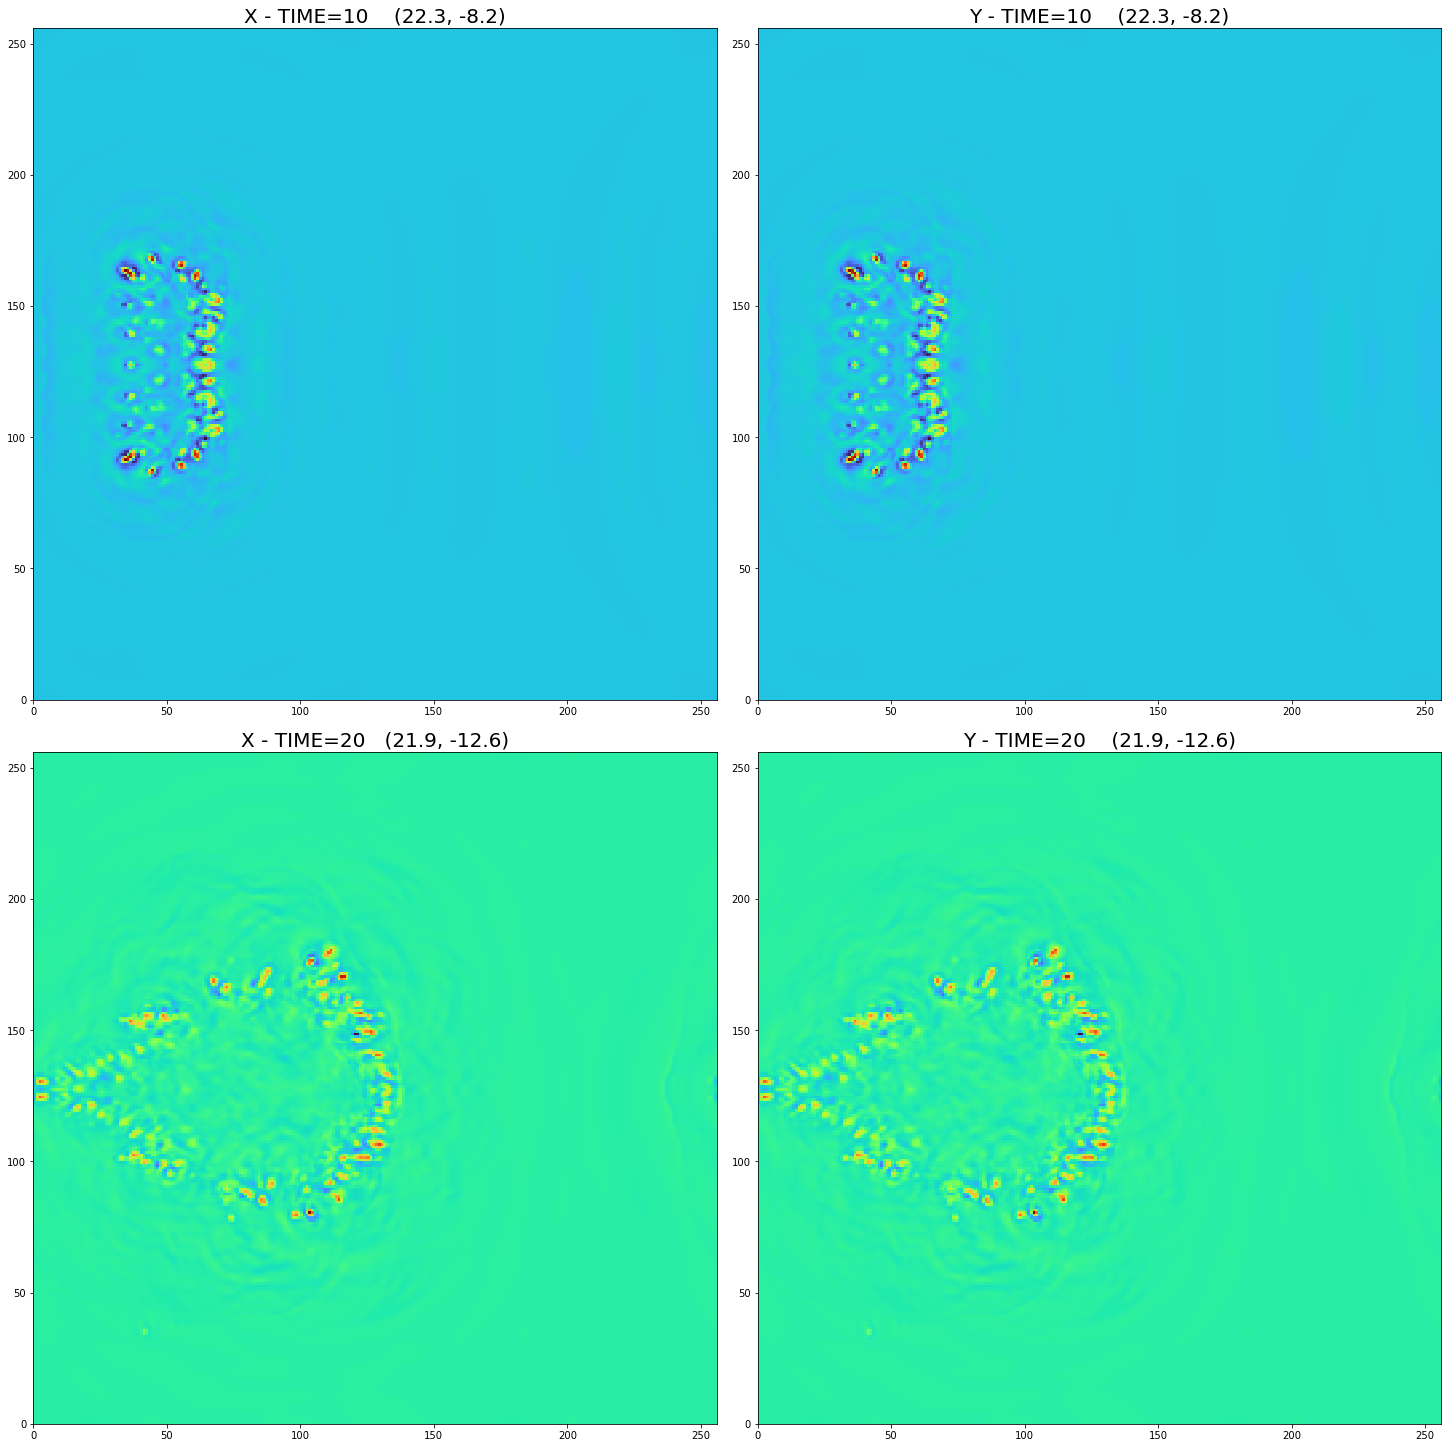

In [59]:
klevel = 20
time   = 10

fig, ax = plt.subplots(2,2, constrained_layout=True,figsize=(20,20))
ax[0][0].pcolormesh(run1_w[time, klevel], cmap='turbo')
ax[0][0].set_title('X - TIME=10    (%3.1f, %3.1f)' % (run1_w[time, klevel].max(), run1_w[time, klevel].min()),fontsize=20)
ax[0][1].pcolormesh(run3_w[time, klevel], cmap='turbo')
ax[0][1].set_title('Y - TIME=10    (%3.1f, %3.1f)' % (run3_w[time, klevel].max(), run3_w[time, klevel].min()),fontsize=20)

time = 20

ax[1][0].pcolormesh(run1_w[time, klevel], cmap='turbo')
ax[1][0].set_title('X - TIME=20   (%3.1f, %3.1f)' % (run1_w[time, klevel].max(), run1_w[time, klevel].min()),fontsize=20)
ax[1][1].pcolormesh(run3_w[time, klevel], cmap='turbo')
ax[1][1].set_title('Y - TIME=20    (%3.1f, %3.1f)' % (run3_w[time, klevel].max(), run3_w[time, klevel].min()),fontsize=20)


plt.show()



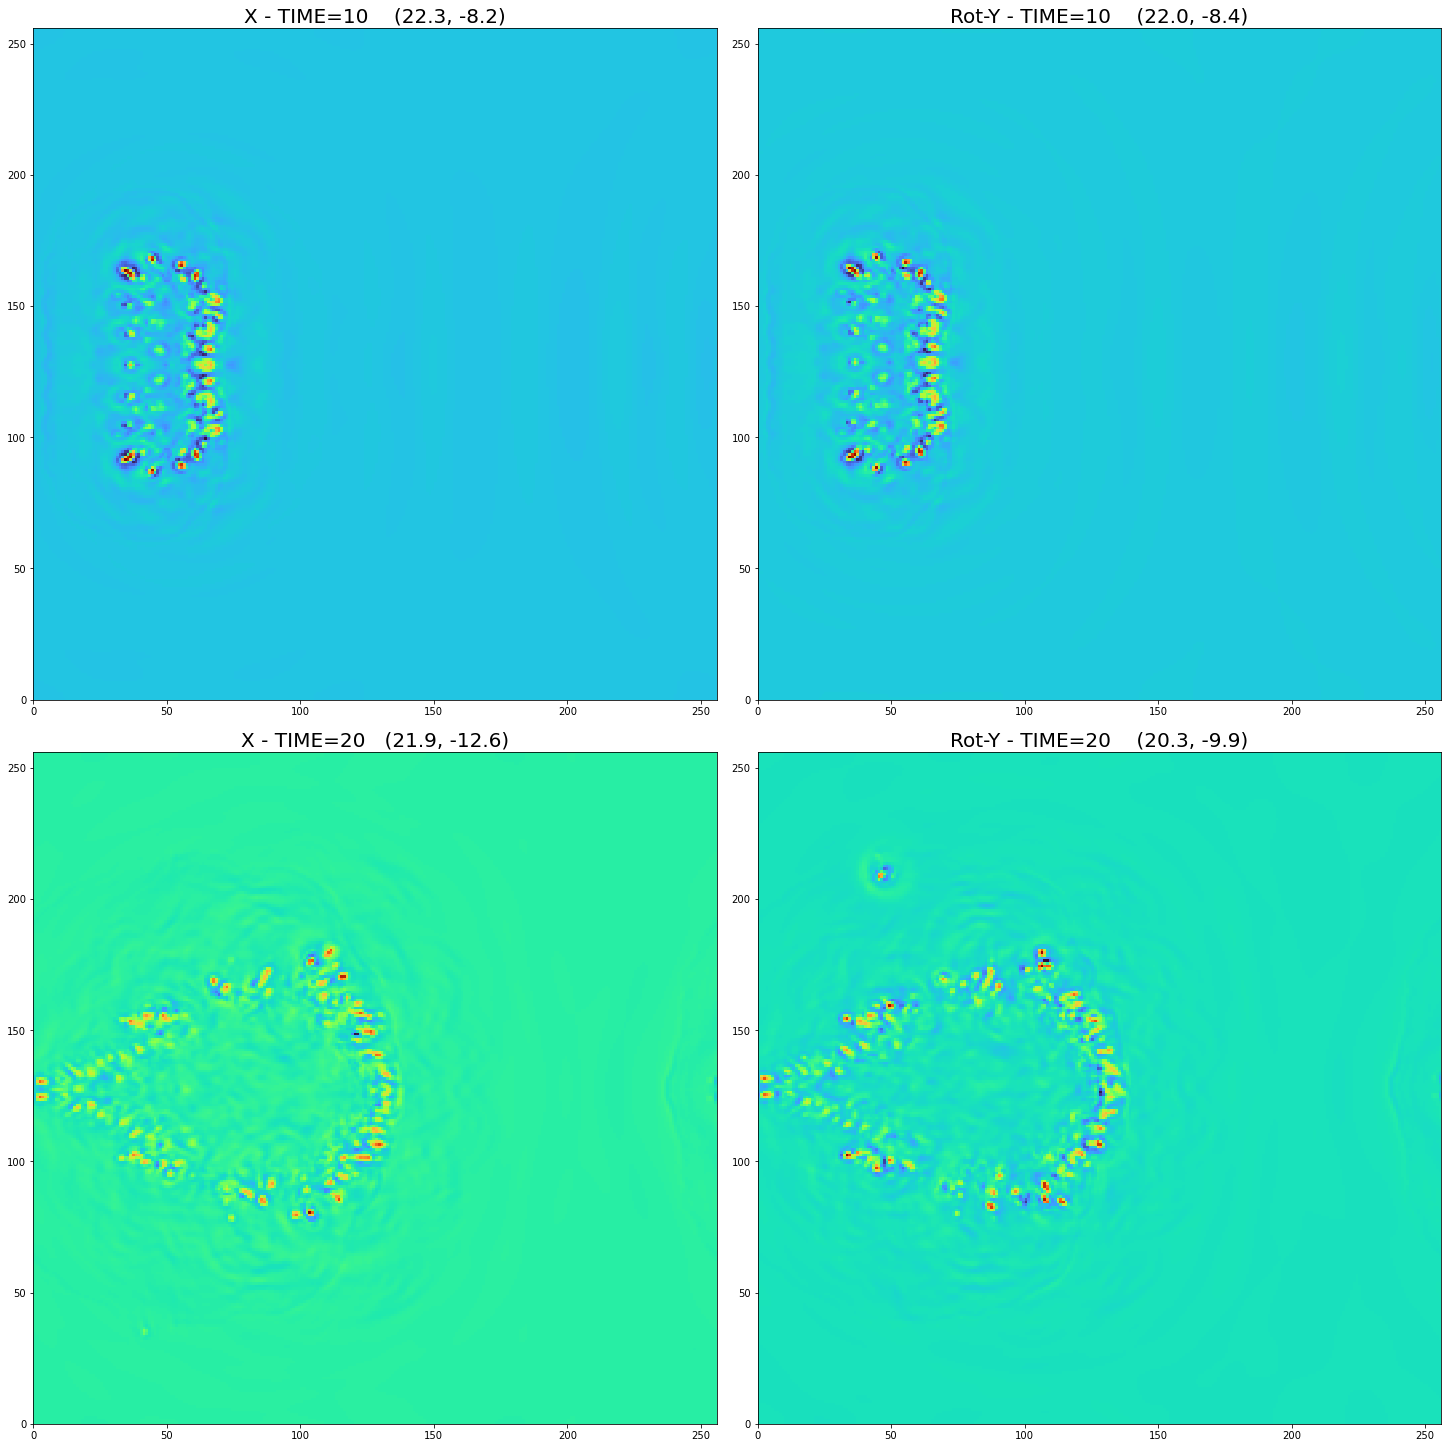

In [54]:
klevel = 20
time   = 10

fig, ax = plt.subplots(2,2, constrained_layout=True,figsize=(20,20))
ax[0][0].pcolormesh(run1_w[time, klevel], cmap='turbo')
ax[0][0].set_title('X - TIME=10    (%3.1f, %3.1f)' % (run1_w[time, klevel].max(), run1_w[time, klevel].min()),fontsize=20)
ax[0][1].pcolormesh(np.rot90(run2_w[time, klevel],1), cmap='turbo')
ax[0][1].set_title('Rot-Y - TIME=10    (%3.1f, %3.1f)' % (run2_w[time, klevel].max(), run2_w[time, klevel].min()),fontsize=20)

time = 20

ax[1][0].pcolormesh(run1_w[time, klevel], cmap='turbo')
ax[1][0].set_title('X - TIME=20   (%3.1f, %3.1f)' % (run1_w[time, klevel].max(), run1_w[time, klevel].min()),fontsize=20)
ax[1][1].pcolormesh(np.rot90(run2_w[time, klevel],1), cmap='turbo')
ax[1][1].set_title('Rot-Y - TIME=20    (%3.1f, %3.1f)' % (run2_w[time, klevel].max(), run2_w[time, klevel].min()),fontsize=20)


plt.show()


In [55]:
diff = np.zeros((24,256,256))

for n in np.arange(24):
    w1 = run1_w[n,klevel]
    w2 = run2_w[n,klevel]
    
    diff[n] = w1 - np.rot90(w2, 1)
    
    

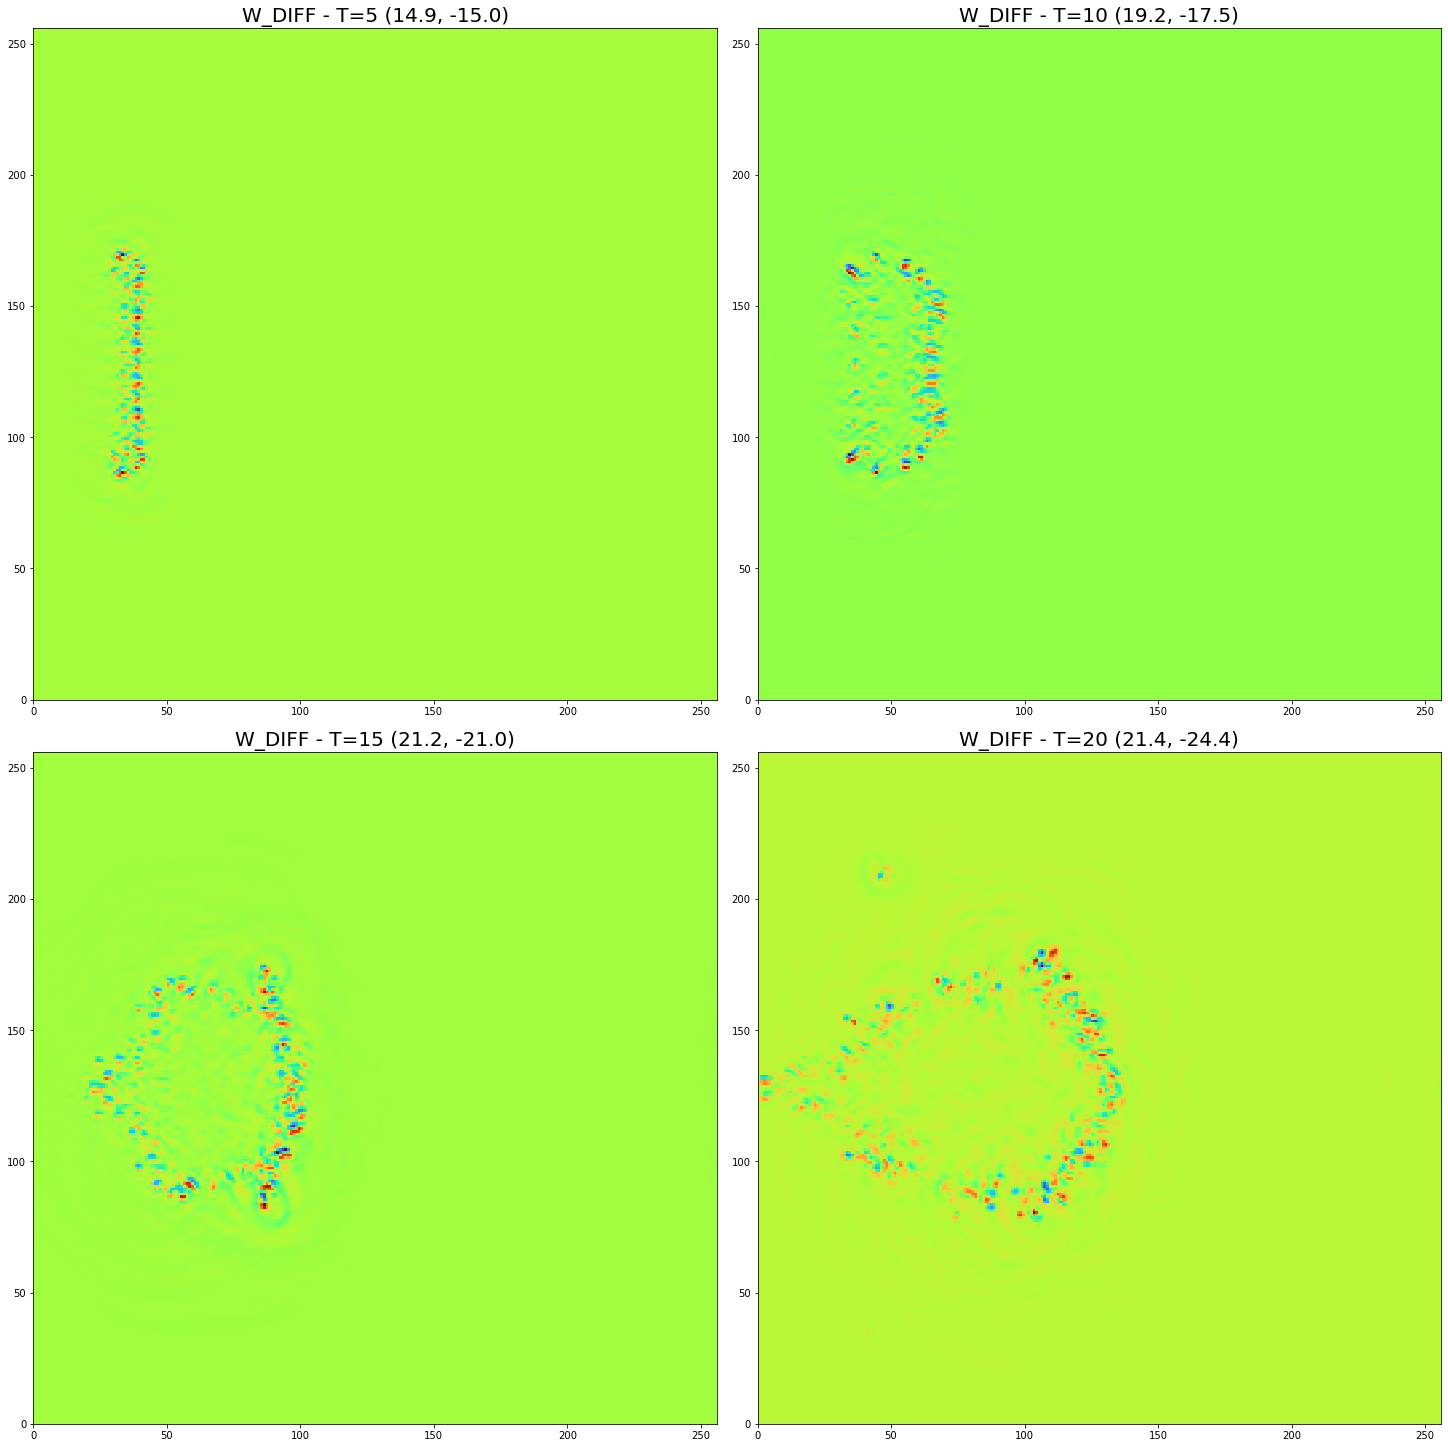

In [56]:
fig, ax = plt.subplots(2,2, constrained_layout=True,figsize=(20,20))

ax[0][0].pcolormesh(diff[5], cmap='turbo')
ax[0][0].set_title('W_DIFF - T=5 (%3.1f, %3.1f)' % (diff[5].max(), diff[5].min()),fontsize=20)

ax[0][1].pcolormesh(diff[10], cmap='turbo')
ax[0][1].set_title('W_DIFF - T=10 (%3.1f, %3.1f)' % (diff[10].max(), diff[10].min()),fontsize=20)

ax[1][0].pcolormesh(diff[15], cmap='turbo')
ax[1][0].set_title('W_DIFF - T=15 (%3.1f, %3.1f)' % (diff[15].max(), diff[15].min()),fontsize=20)

ax[1][1].pcolormesh(diff[20], cmap='turbo')
ax[1][1].set_title('W_DIFF - T=20 (%3.1f, %3.1f)' % (diff[20].max(), diff[20].min()),fontsize=20)



plt.show()



In [60]:
diff = np.zeros((24,256,256))

for n in np.arange(24):
    w1 = run1_w[n,klevel]
    w2 = run3_w[n,klevel]
    
    diff[n] = w1 - w2

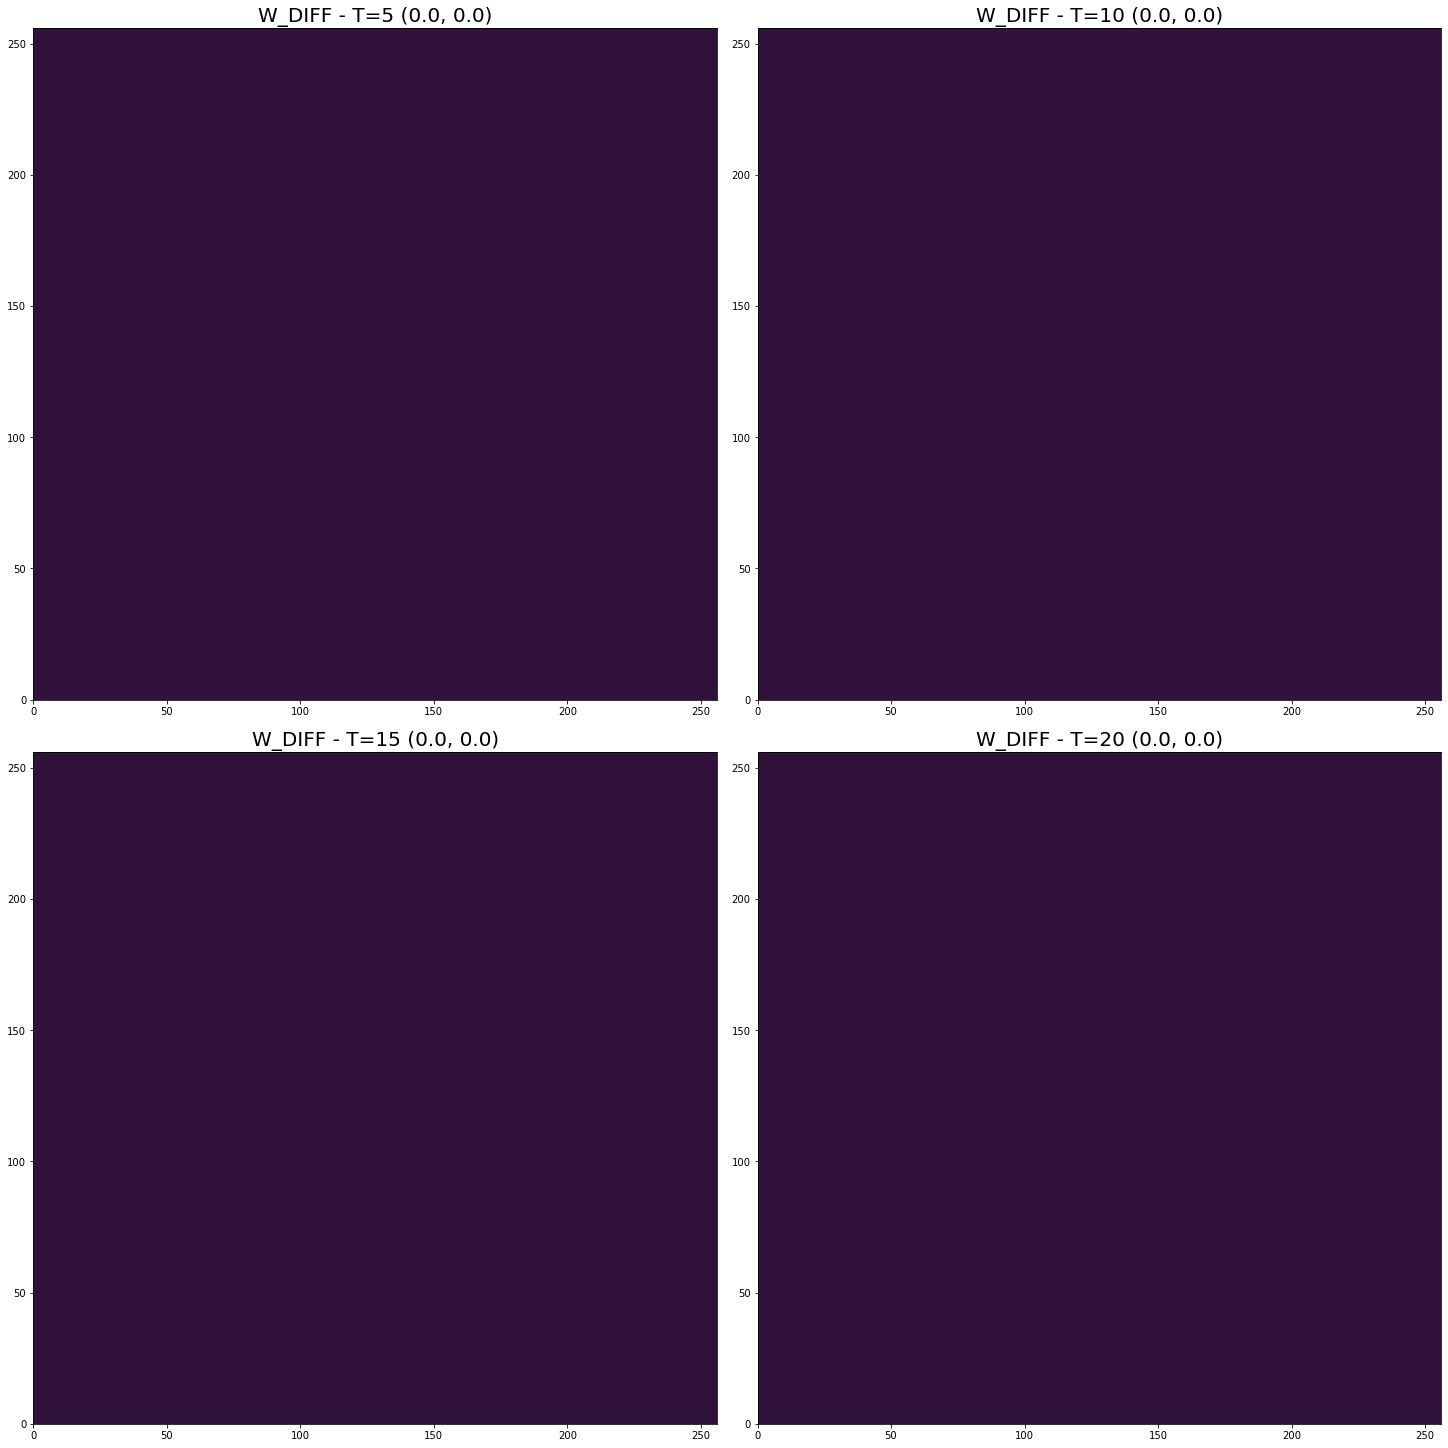

In [61]:
fig, ax = plt.subplots(2,2, constrained_layout=True,figsize=(20,20))

ax[0][0].pcolormesh(diff[5], cmap='turbo')
ax[0][0].set_title('W_DIFF - T=5 (%3.1f, %3.1f)' % (diff[5].max(), diff[5].min()),fontsize=20)

ax[0][1].pcolormesh(diff[10], cmap='turbo')
ax[0][1].set_title('W_DIFF - T=10 (%3.1f, %3.1f)' % (diff[10].max(), diff[10].min()),fontsize=20)

ax[1][0].pcolormesh(diff[15], cmap='turbo')
ax[1][0].set_title('W_DIFF - T=15 (%3.1f, %3.1f)' % (diff[15].max(), diff[15].min()),fontsize=20)

ax[1][1].pcolormesh(diff[20], cmap='turbo')
ax[1][1].set_title('W_DIFF - T=20 (%3.1f, %3.1f)' % (diff[20].max(), diff[20].min()),fontsize=20)



plt.show()